# サンプル用に画像をWebから持ってくる

※Google Driveに接続する方法もあるので実用したい人は調べると良い

In [ ]:
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/baboon200.jpg
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/IMG_0710.JPG
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/IMG_0713.JPG

--2021-05-25 00:16:53--  https://github.com/eiichiromomma/CVMLAB/raw/master/img/baboon200.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/baboon200.jpg [following]
--2021-05-25 00:16:53--  https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/baboon200.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21952 (21K) [image/jpeg]
Saving to: ‘baboon200.jpg’

baboon200.jpg       100%[===================>]  21.44K  --.-KB/s    in 0s      

2021-05-25 00:16:53 (74.0 MB/s) - ‘baboon200.jpg’ saved [21952/21952]

--2021-05-25 00:16:53--  https://github.com/

# ヒストグラム処理

OpenCVはPythonだとcv2として呼び出す。

cv2のhistogramは面倒なのでmatplotlibの方を使う。(細かい話は[ここ](https://github.com/eiichiromomma/jjspe202010/blob/master/notebooks/Q11-20.ipynb)参照。

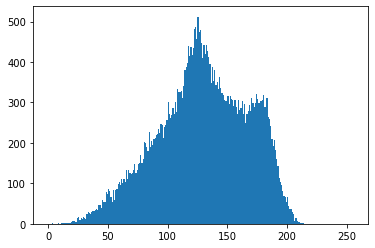

In [ ]:
# %matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('baboon200.jpg', cv2.IMREAD_GRAYSCALE)
x = plt.hist(img.ravel(), bins=255, range=(0, 255))


## ヒストグラム平滑化によりコントラストを改善する

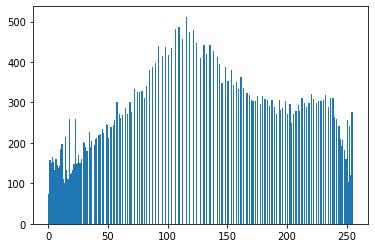

In [ ]:
dst = cv2.equalizeHist(img)
x = plt.hist(dst.ravel(), bins=255, range=(0, 255))


左が原画像，右がヒストグラム平滑化後

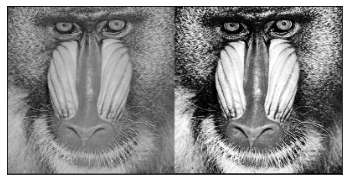

In [ ]:
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
plt.imshow(cv2.hconcat([img, dst]), cmap='gray')


## ノイズの多い画像の場合
左が通常の明るさで撮影した画像，右が暗所で撮影した画像

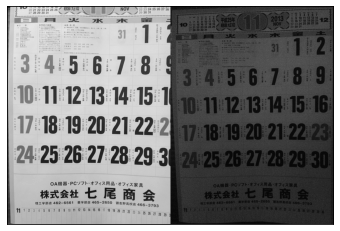

In [ ]:
img1 = cv2.imread('IMG_0710.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('IMG_0713.JPG', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.hconcat([img1, img2]), cmap='gray')


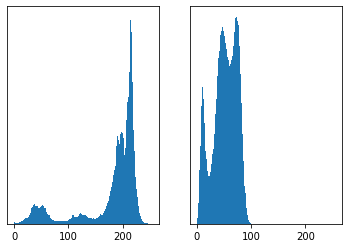

In [ ]:
plt.rc('xtick', bottom=True, labelbottom=True)
plt.subplot(1,2,1)
x = plt.hist(img1.ravel(), bins=255, range=(0, 255))
plt.subplot(1,2,2)
x = plt.hist(img2.ravel(), bins=255, range=(0, 255))


暗所で撮影した画像のコントラストを改善する(S/Nの問題で限度がある)

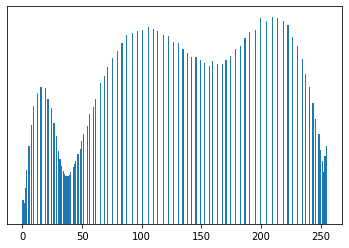

In [ ]:
dst = cv2.equalizeHist(img2)
x = plt.hist(dst.ravel(), bins=255, range=(0, 255))


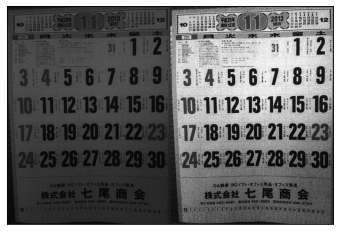

In [ ]:
plt.rc('xtick', bottom=False, labelbottom=False)
plt.imshow(cv2.hconcat([img2,dst]), cmap='gray')

# プロファイル

OpenCVだと任意の点間のプロファイル取得は面倒なのでscikit imageを使う

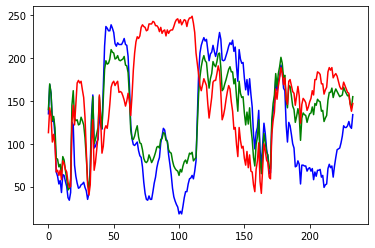

In [ ]:
plt.rc('xtick', bottom=True, labelbottom=True)
plt.rc('ytick', left = True, labelleft = True)
from skimage.measure import profile_line
img = cv2.imread('baboon200.jpg', cv2.IMREAD_ANYCOLOR)
start = (5, 150)
end = (190, 10)
profile = profile_line(img, start, end, linewidth=1)
plt.plot(profile[:,0], 'b-')
plt.plot(profile[:,1], 'g-')
plt.plot(profile[:,2], 'r-')

どこをプロットしたか線を引く。OpenCVだとXORの線を直接描画はできないが，同じサイズの画像をzerosで作って白の線なり図形なりを描いてから，bitwise_xorでxorをとると同じことが出来る。試しにコメントアウトしてあるbitwise_xorの行のコメントを外すと線が消える。(XORを2度描画すると消える)

(200, 200, 3)

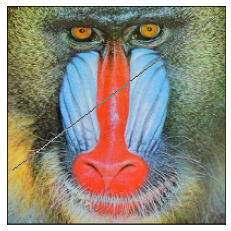

In [ ]:
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
lineimg = np.zeros(img.shape, dtype=np.uint8)
lineimg = cv2.line(lineimg, start, end, (255,255,255), thickness=1)
dst = cv2.bitwise_xor(img, lineimg)
# dst = cv2.bitwise_xor(dst, lineimg)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
lineimg.shape


# Colourパッケージを使った例
pip では colour-scienceとして配布されている

In [ ]:
!pip install colour-science

## カラースペクトルの表示
colourのplottingには色関係のプロットが多数ある。例としてスペクトルの表示。

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0af02261d0>)

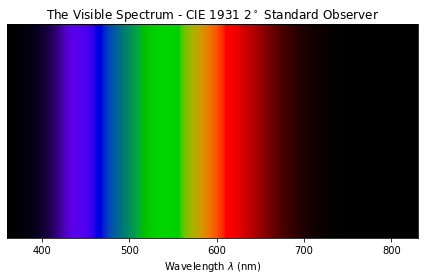

In [ ]:
import matplotlib.pyplot as plt
import colour.plotting as cplt
plt.rc('xtick', bottom=True, labelbottom=True)
plt.rc('ytick', left = True, labelleft = True)
cplt.plot_visible_spectrum()

## A光源とD65光源のスペクトル

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0aef388b50>)

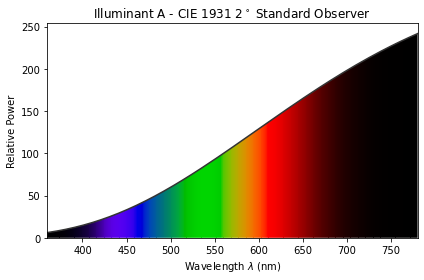

In [ ]:
cplt.plot_single_illuminant_sd('A')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0aef041f90>)

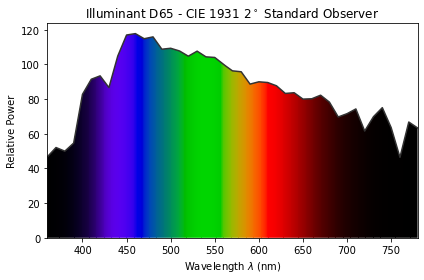

In [ ]:
cplt.plot_single_illuminant_sd('D65')

## CIE 1931色度図のプロット
standalone=Falseにしておいて，あとでrenderを使ってstandalone=Trueにする。MATLABのhold on/offと同じと思われる。

取り回しが楽なのでnumpyを使っている。

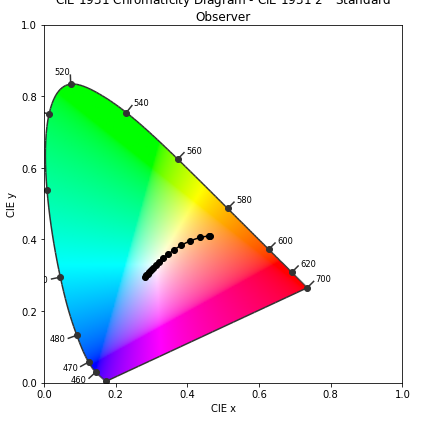

In [ ]:
import colour
import numpy as np
xy = []
for t in range(2000, 10000, 500):
  xy.append(colour.temperature.CCT_to_xy(t))
xy = np.array(xy)
cplt.plot_chromaticity_diagram_CIE1931(standalone=False)
plt.plot(xy[:,0], xy[:, 1], 'o-', color = 'black')
cplt.render(standalone=True);

## 色域の表示
旧来のテレビの規格ITU-R BT.709と，最近の規格BT. 2020およびCG等のACEScgでは表現可能な色域に大きな違いがある

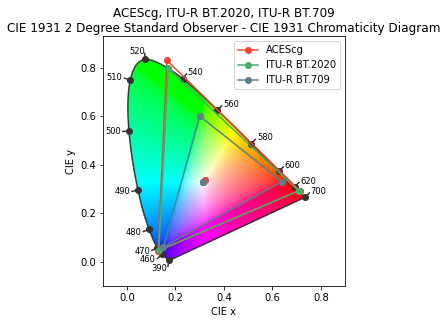

In [ ]:
sorted(colour.RGB_COLOURSPACES)
cplt.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(['ACEScg', 'ITU-R BT.2020', 'ITU-R BT.709']);


## MacAdamの楕円
CIE1931は局所的な面積とヒトの感じる色の違いとに色によって差が出てしまう

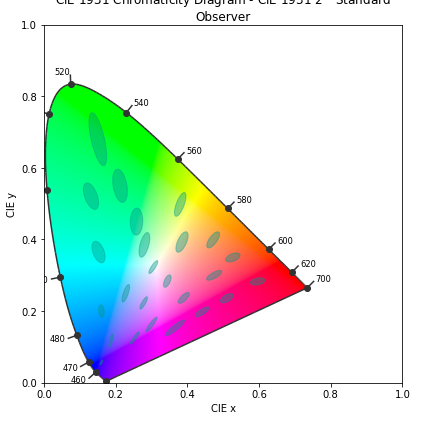

In [ ]:
cplt.plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1931();

# 表色系の変換
OpenCVだとcvtColorを使う(BGRが標準)

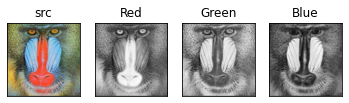

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.rc('xtick', bottom=False, labelbottom=False)
plt.rc('ytick', left = False, labelleft = False)
img = cv2.imread('baboon200.jpg', cv2.IMREAD_ANYCOLOR)
b, g, r = cv2.split(img)
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('src')
plt.subplot(1,4,2)
plt.imshow(r, cmap='gray')
plt.title('Red')
plt.subplot(1,4,3)
plt.imshow(g, cmap='gray')
plt.title('Green')
plt.subplot(1,4,4)
plt.imshow(b, cmap='gray')
plt.title('Blue');


## CIE1976 L\*a\*b* 色空間
CIE1976 L\*a\*b* 色空間へ変換。明度L\*と色みのa\*b\*に分離して使われるケースが多い

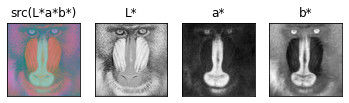

In [ ]:
Labimg = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
Lab_l, Lab_a, Lab_b = cv2.split(Labimg)
plt.subplot(1,4,1)
plt.imshow(Labimg)
plt.title('src(L*a*b*)')
plt.subplot(1,4,2)
plt.imshow(Lab_l, cmap='gray')
plt.title('L*')
plt.subplot(1,4,3)
plt.imshow(Lab_a, cmap='gray')
plt.title('a*')
plt.subplot(1,4,4)
plt.imshow(Lab_b, cmap='gray')
plt.title('b*');

## HSV
HSVに変換して各成分を表示。HのHue(色相)は単純な色のピックアップによく使われる。
ここでは事前にfloat32形式に変換しているのでHueは0〜360度の数値をそのまま使える。

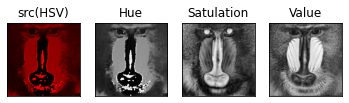

In [ ]:
import numpy as np
hsvimg = cv2.cvtColor(np.float32(img)/255., cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsvimg)
plt.subplot(1,4,1)
plt.imshow(hsvimg/360)
plt.title('src(HSV)')
plt.subplot(1,4,2)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(1,4,3)
plt.imshow(s, cmap='gray')
plt.title('Satulation')
plt.subplot(1,4,4)
plt.imshow(b, cmap='gray')
plt.title('Value');

## Hueを使った領域抽出
1. 色相が20度以下か340度以上の範囲を抽出->redmap
1. redmapを3枚重ねて3チャネル画像を作る->redmap3
1. cv2.bitwise_andで画素ごとにANDをとる(赤のところだけ抽出)->dst

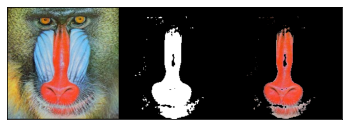

In [ ]:
redmap = np.uint8(np.logical_or(h<20, h>340))*255
redmap3 = cv2.merge((redmap, redmap, redmap))
dst = cv2.bitwise_and(img, redmap3)
plt.imshow(cv2.hconcat([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), redmap3, cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)]))

# アルファブレンディング
行列に対して直で比率を乗算できるので，サイズさえ一緒なら係数を乗算して足すだけ。

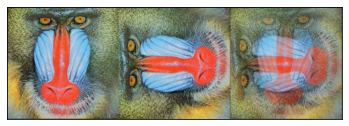

In [ ]:
imgrot = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
dst = np.uint8(img*0.4 + imgrot*0.6)
plt.imshow(cv2.hconcat([cv2.cvtColor(img,cv2.COLOR_BGR2RGB),
                        cv2.cvtColor(imgrot, cv2.COLOR_BGR2RGB),
                        cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)]))

# クロマキー合成
通常存在しない色(キツい緑とか青とか)を背景として抽出しやすい状態にする。あとは色域抽出して，その部分を背景に塗り替える

In [ ]:
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/saba.png
!wget https://github.com/eiichiromomma/CVMLAB/raw/master/img/sample.jpg

--2021-05-23 04:08:06--  https://github.com/eiichiromomma/CVMLAB/raw/master/img/saba.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/saba.png [following]
--2021-05-23 04:08:06--  https://raw.githubusercontent.com/eiichiromomma/CVMLAB/master/img/saba.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651697 (636K) [image/png]
Saving to: ‘saba.png.2’

saba.png.2          100%[===================>] 636.42K  --.-KB/s    in 0.03s   

2021-05-23 04:08:06 (20.0 MB/s) - ‘saba.png.2’ saved [651697/651697]

--2021-05-23 04:08:07--  https://github.com/eiichiromomma/

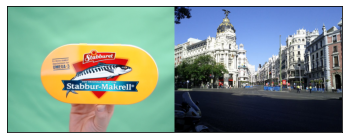

In [ ]:
saba = cv2.imread('saba.png', cv2.IMREAD_ANYCOLOR)
bg = cv2.imread('sample.jpg', cv2.IMREAD_ANYCOLOR)
h, w, _ = bg.shape
saba = cv2.resize(saba, (w, h))
plt.imshow(cv2.cvtColor(cv2.hconcat([saba, bg]), cv2.COLOR_BGR2RGB));

## HSV画像に変換して150\<Hue\<180の領域を抽出する

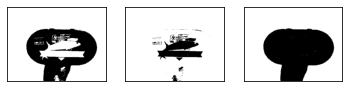

In [ ]:
hsvsaba = cv2.cvtColor(np.float32(saba), cv2.COLOR_BGR2HSV)
hue, sat, _ = cv2.split(hsvsaba)
th1 = 150
th2 = 180
plt.subplot(1,3,1)
plt.imshow(th1<hue, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(hue<th2, cmap='gray')
plt.subplot(1,3,3)
bg_mask = np.logical_and(th1<hue, hue<th2)
plt.imshow(bg_mask, cmap='gray')

## maskを使った抽出
抽出した領域とsaba画像のbitwise_and, 抽出した領域のlogical_notとbg画像のbitwise_andをとれば前景と背景を抽出できる

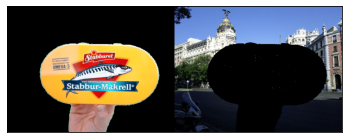

In [ ]:
bg_mask3 = cv2.merge((np.uint8(bg_mask), np.uint8(bg_mask), np.uint8(bg_mask)))*255
fg_mask = np.logical_not(bg_mask)
fg_mask3 = cv2.merge((np.uint8(fg_mask), np.uint8(fg_mask), np.uint8(fg_mask)))*255
plt.imshow(cv2.cvtColor(cv2.hconcat([cv2.bitwise_and(saba, fg_mask3), cv2.bitwise_and(bg, bg_mask3)]),
                        cv2.COLOR_BGR2RGB))

あとは両者を足すだけ

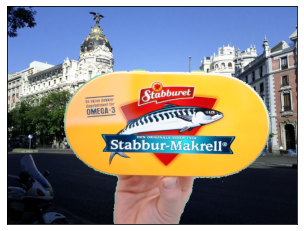

In [ ]:
dst = cv2.bitwise_and(saba, fg_mask3) + cv2.bitwise_and(bg, bg_mask3)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))